<a href="https://colab.research.google.com/github/StephaniePC1/ThisIsWhatIDoNow/blob/master/GPV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

path = "https://github.com/fivethirtyeight/data/raw/master/star-wars-survey/StarWars.csv"
star_wars = pd.read_csv(path, encoding="ISO-8859-1")
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,4,3,6,5,2,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Neither favorabl

## Cleaning and Mapping Yes/No Columns

In [ ]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [ ]:
yes_no = {"Yes": True, "No": False}

for col in [
    "Have you seen any of the 6 films in the Star Wars franchise?",
    "Do you consider yourself to be a fan of the Star Wars film franchise?"
    ]:
    star_wars[col] = star_wars[col].map(yes_no)

star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,4,3,6,5,2,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,N

In [ ]:
movie_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_mapping)

In [ ]:
star_wars = star_wars.rename(columns={
        "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
        "Unnamed: 4": "seen_2",
        "Unnamed: 5": "seen_3",
        "Unnamed: 6": "seen_4",
        "Unnamed: 7": "seen_5",
        "Unnamed: 8": "seen_6"
        })

star_wars.head(15)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,True,True,True,True,True,True,True,True,1,4,3,6,5,2,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Neither favorably nor unfavorably (neutral),Very favorably,Neither favorably nor unfavorably (neutral),Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,True,True,True,True,True,True,True,True,6,5,4,3,1,2,Very favorably,Very favorably,Somewhat favorably,Somewhat favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat unfavorably,Somewhat favorably,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,True,True,True,True,True,True,True,True,4,5,6,3,2,1,Very favorably,Somewhat favorably,Very favorably,Neither favorably nor unfavorably (neutral),Very favorably,Very unfavorably,Somewhat unfavorably,Neither favorably nor unfavorably (neutral),Somewhat favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat unfavorably,Very favorably,Ha

In [ ]:
star_wars = star_wars.rename(columns={
        "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
        "Unnamed: 10": "ranking_2",
        "Unnamed: 11": "ranking_3",
        "Unnamed: 12": "ranking_4",
        "Unnamed: 13": "ranking_5",
        "Unnamed: 14": "ranking_6"
        })

star_wars.head(15)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,True,True,True,True,True,True,True,True,1,4,3,6,5,2,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Neither favorably nor unfavorably (neutral),Very favorably,Neither favorably nor unfavorably (neutral),Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,True,True,True,True,True,True,True,True,6,5,4,3,1,2,Very favorably,Very favorably,Somewhat favorably,Somewhat favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat unfavorably,Somewhat favorably,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,True,True,True,True,True,True,True,True,4,5,6,3,2,1,Very favorably,Somewhat favorably,Very favorably,Neither favorably nor unfavorably (neutral),Very favorably,Very unfavorably,Somewhat unfavorably,Neither favorably nor unfavorably (neutral),Somewhat favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat unfavorably,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,True,True,True,True,True,True,True,True,5,4,6,2,1,3,Very favorabl

In [ ]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [ ]:
star_wars[star_wars.columns[9:15]].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

<BarContainer object of 6 artists>

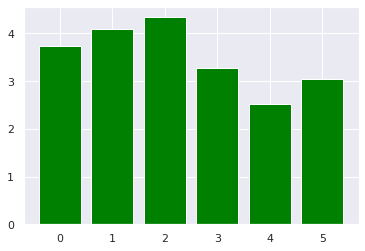

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.bar(range(6), star_wars[star_wars.columns[9:15]].mean(), color= "green")

In [ ]:
star_wars[star_wars.columns[3:9]].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

In [ ]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

<BarContainer object of 6 artists>

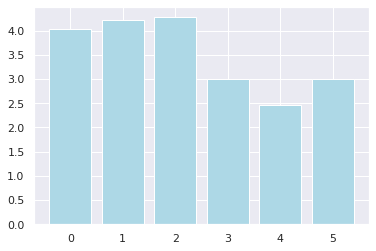

In [ ]:
male_bar_plot=plt.bar(range(6), males[males.columns[9:15]].mean(), color= "lightblue")
male_bar_plot

<BarContainer object of 6 artists>

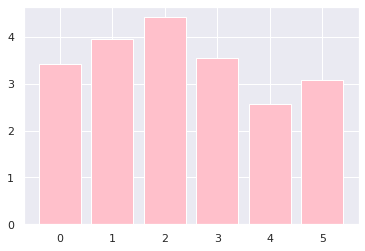

In [ ]:
female_bar_plot=plt.bar(range(6), females[females.columns[9:15]].mean(), color="pink")
female_bar_plot

<BarContainer object of 6 artists>

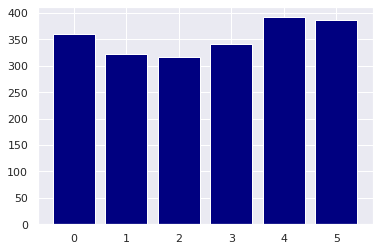

In [ ]:
sum_male=plt.bar(range(6), males[males.columns[3:9]].sum(), color="navy")
sum_male

<BarContainer object of 6 artists>

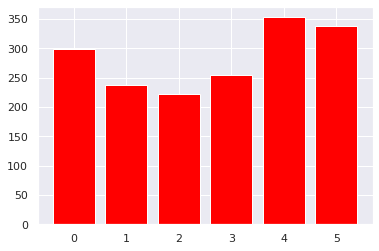

In [ ]:
sum_female=plt.bar(range(6), females[females.columns[3:9]].sum(), color= "red")
sum_female

## **Analysis Of Age and Thoughts on Star Wars**

This section of the project will focus on how different age demographics tend to feel about vaious aspects of the Star Wars Universe. Variables that will looked at are the favorite film of individuals in the age brackets of 18-29, 30-44, 45-60, and > 60, their least favoirte film, and their familiarity with and opinion of the expanded Unviverse. 

###Age Demographics and The Top Ranking Star Wars Film


In [ ]:
import seaborn as sns

In [ ]:
print(star_wars['Age'].value_counts())

45-60    291
> 60     269
30-44    268
18-29    218
Name: Age, dtype: int64


In [ ]:
round(star_wars['Age'].value_counts(normalize=True) ,4) *100


45-60    27.82
> 60     25.72
30-44    25.62
18-29    20.84
Name: Age, dtype: float64

In [ ]:
ranking_1_counts=(star_wars["ranking_1"])

In [ ]:
Fortyfive_Sixty=star_wars[star_wars["Age"] == "45-60"]
Older_than_Sixty= star_wars[star_wars["Age"] == "> 60"]
Thirty_Fortyfour= star_wars[star_wars["Age"] == "30-44"]
Eighteen_Twentynine= star_wars[star_wars["Age"] == "18-29"]

In [ ]:
young_no_1=round(Eighteen_Twentynine['ranking_1'].value_counts(normalize=True) ,4)*100
middle_age_no_1=round(Thirty_Fortyfour['ranking_1'].value_counts(normalize=True) ,4)*100
older_no_1=round(Fortyfive_Sixty['ranking_1'].value_counts(normalize=True) ,4)*100
elderly_no_1=round(Older_than_Sixty['ranking_1'].value_counts(normalize=True) ,4)*100
print(young_no_1)

6.0    27.22
4.0    23.33
5.0    18.33
1.0    11.67
3.0    11.11
2.0     8.33
Name: ranking_1, dtype: float64


In [ ]:
print(middle_age_no_1)

6.0    34.30
4.0    27.54
3.0    13.53
5.0    12.08
1.0     7.25
2.0     5.31
Name: ranking_1, dtype: float64


In [ ]:
print(older_no_1)

4.0    35.00
3.0    18.33
1.0    14.17
5.0    11.67
6.0    11.25
2.0     9.58
Name: ranking_1, dtype: float64


In [ ]:
print(elderly_no_1)

1.0    27.60
4.0    26.04
3.0    18.75
2.0    11.46
6.0     9.38
5.0     6.77
Name: ranking_1, dtype: float64


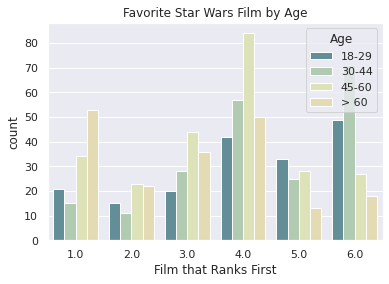

In [ ]:
sns.set_palette("Spectral_r", desat=.65)
sns.countplot(x="ranking_1", hue= "Age",  hue_order= ['18-29', '30-44', '45-60', '> 60'], data= star_wars)
plt.title('Favorite Star Wars Film by Age')
plt.xlabel('Film that Ranks First')
sns.set(rc={'figure.figsize':(15,13)})

####Results of the Analysis of Age Demographics and The Top Ranking Star Wars Film

* The Star Wars film the most ranked the highest amongst those aged 18-29 and 30-44 is the sixth film, for those 45-60 it's the fourth film, and those greater than 60 favor the first film.

* The film that was the leased favored for 18-29, 30-44, and 45-60 was the second film while those greater than 60 least favored the fifth film.

###Age Demographics and The Lowest Ranking Star Wars Film

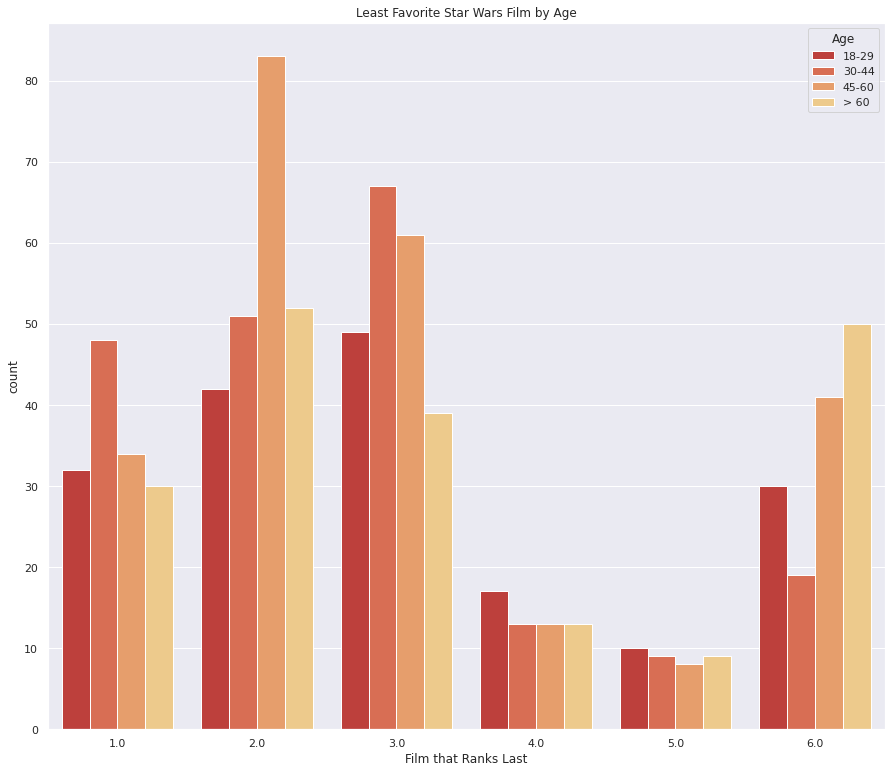

In [ ]:
sns.set_palette("RdYlGn" ,10)
sns.countplot(x="ranking_6", hue= "Age",  hue_order= ['18-29', '30-44', '45-60', '> 60'], data= star_wars)
plt.title('Least Favorite Star Wars Film by Age')
plt.xlabel('Film that Ranks Last')
sns.set(rc={'figure.figsize':(15,13)})

####Results of the Analysis of Age Demographics and The Lowest Ranking Star Wars Film

* The Star Wars film ranked the lowest amongst those agend 18-29 and 30-44 is the third film, for those 45-60 it's the second film, and those greater than 60 favor the sixth film.

* The film that was ranked last the least amount for all age demographics was fifth the fifth film. Notably the second least last ranked film was the fourth film across all demographics as well. 

###Age Demographics and Interest in the Expanded Universe

In [ ]:
expuni=round(star_wars['Are you familiar with the Expanded Universe?'].value_counts(normalize=True) ,4)*100

In [ ]:
print("familiar with the expanded universe"); print(expuni)

familiar with the expanded universe
No     74.28
Yes    25.72
Name: Are you familiar with the Expanded Universe?, dtype: float64


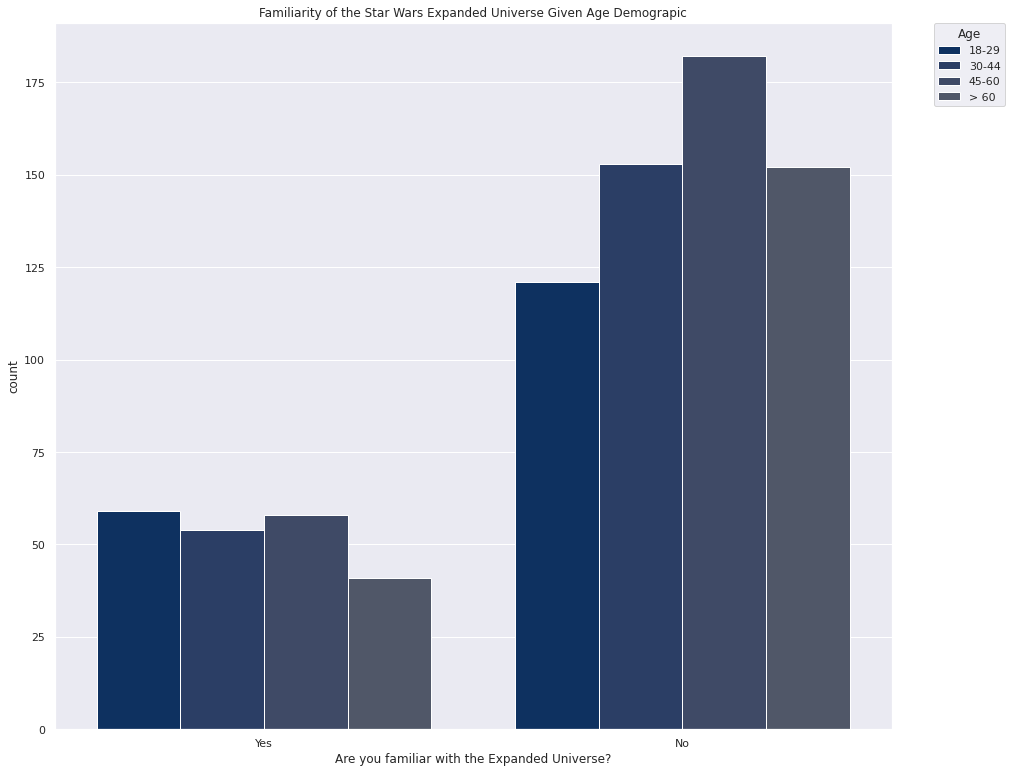

In [ ]:
sns.set_palette("cividis" ,13)
sns.countplot(x="Are you familiar with the Expanded Universe?", hue="Age" , hue_order= ['18-29', '30-44', '45-60', '> 60'], data= star_wars)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Age')
plt.title('Familiarity of the Star Wars Expanded Universe Given Age Demograpic')
plt.xlabel('Are you familiar with the Expanded Universe?')
sns.set(rc={'figure.figsize':(15,13)})

In [ ]:
young_familair=round(Eighteen_Twentynine["Are you familiar with the Expanded Universe?"].value_counts(normalize=True) ,4)*100
middle_familiar=round(Thirty_Fortyfour["Are you familiar with the Expanded Universe?"].value_counts(normalize=True) ,4)*100
older_familiar=round(Fortyfive_Sixty["Are you familiar with the Expanded Universe?"].value_counts(normalize=True) ,4)*100
elderly_familiar=round(Older_than_Sixty["Are you familiar with the Expanded Universe?"].value_counts(normalize=True) ,4)*100

print("young_familair"); print(young_familair); print("middle_familair"); print(middle_familiar); print("older_familair"); print(older_familiar); print("elderly_familair"); print(elderly_familiar)

young_familair
No     67.22
Yes    32.78
Name: Are you familiar with the Expanded Universe?, dtype: float64
middle_familair
No     73.91
Yes    26.09
Name: Are you familiar with the Expanded Universe?, dtype: float64
older_familair
No     75.83
Yes    24.17
Name: Are you familiar with the Expanded Universe?, dtype: float64
elderly_familair
No     78.76
Yes    21.24
Name: Are you familiar with the Expanded Universe?, dtype: float64


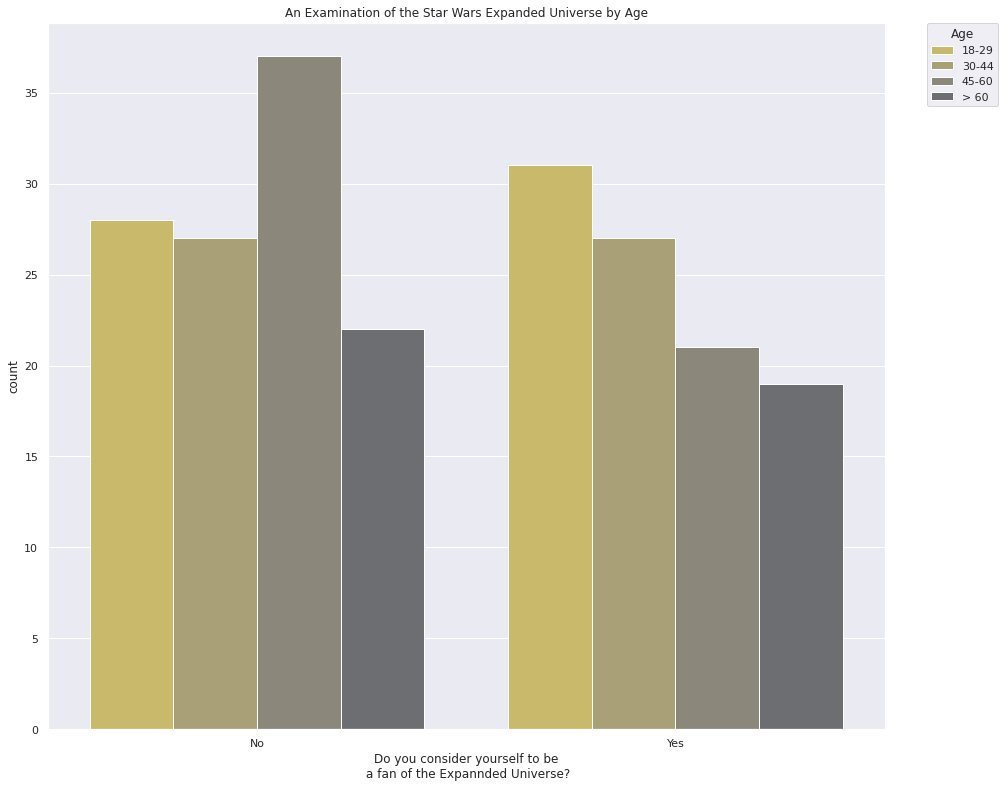

In [ ]:
sns.set_palette("cividis_r")
sns.countplot(x="Do you consider yourself to be a fan of the Expanded Universe?æ", hue="Age" , hue_order= ['18-29', '30-44', '45-60', '> 60'], data= star_wars)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Age')
plt.title('An Examination of the Star Wars Expanded Universe by Age')
plt.xlabel('Do you consider yourself to be\n a fan of the Expannded Universe?')
sns.set(rc={'figure.figsize':(15,13)})

In [ ]:
young_fan=round(Eighteen_Twentynine["Do you consider yourself to be a fan of the Expanded Universe?æ"].value_counts(normalize=True) ,4)*100
middle_fan=round(Thirty_Fortyfour["Do you consider yourself to be a fan of the Expanded Universe?æ"].value_counts(normalize=True) ,4)*100
older_fan=round(Fortyfive_Sixty["Do you consider yourself to be a fan of the Expanded Universe?æ"].value_counts(normalize=True) ,4)*100
elderly_fan=round( Older_than_Sixty["Do you consider yourself to be a fan of the Expanded Universe?æ"].value_counts(normalize=True) ,4)*100

In [ ]:
print("young_fan"); print(young_fan); print("middle_fan"); print(middle_fan); print("older_fan"); print(older_fan); print("elderly_fan"); print(elderly_fan)

young_fan
Yes    52.54
No     47.46
Name: Do you consider yourself to be a fan of the Expanded Universe?æ, dtype: float64
middle_fan
Yes    50.0
No     50.0
Name: Do you consider yourself to be a fan of the Expanded Universe?æ, dtype: float64
older_fan
No     63.79
Yes    36.21
Name: Do you consider yourself to be a fan of the Expanded Universe?æ, dtype: float64
elderly_fan
No     53.66
Yes    46.34
Name: Do you consider yourself to be a fan of the Expanded Universe?æ, dtype: float64


####Results of the Analysis of Age Demographics and Interest in the Expanded Universe

* 74% of all individuals surveyed were unfamiliar with the expanded Star Wars universe.

* Across all age demographics, it was consistant that the majority of those surveyed were unfamiliar with the expanded universe with 18-29 being the most familiar at 32.78% and the > 60 individuals being the least familiar at 21.24%.

* Of those that were familar with the expanded universe the majority of those aged 18-29 and 30-44 were fans of the expanded universe, while the majority of those familiar aged 45-60 and > 60 were not fans.

##**The Influence of Star Trek**

This section will examine how those that identify and do not identify as Star Trek fans fell about certain elements of the Star Wars franchise. Variables analyized will include their favorite and least favorite film in the franchise and also wheter or not they tend to be fans of Star Wars in general.



###Star Trek Fans' and Non-Fans' and their Top Ranking Star Wars Film 

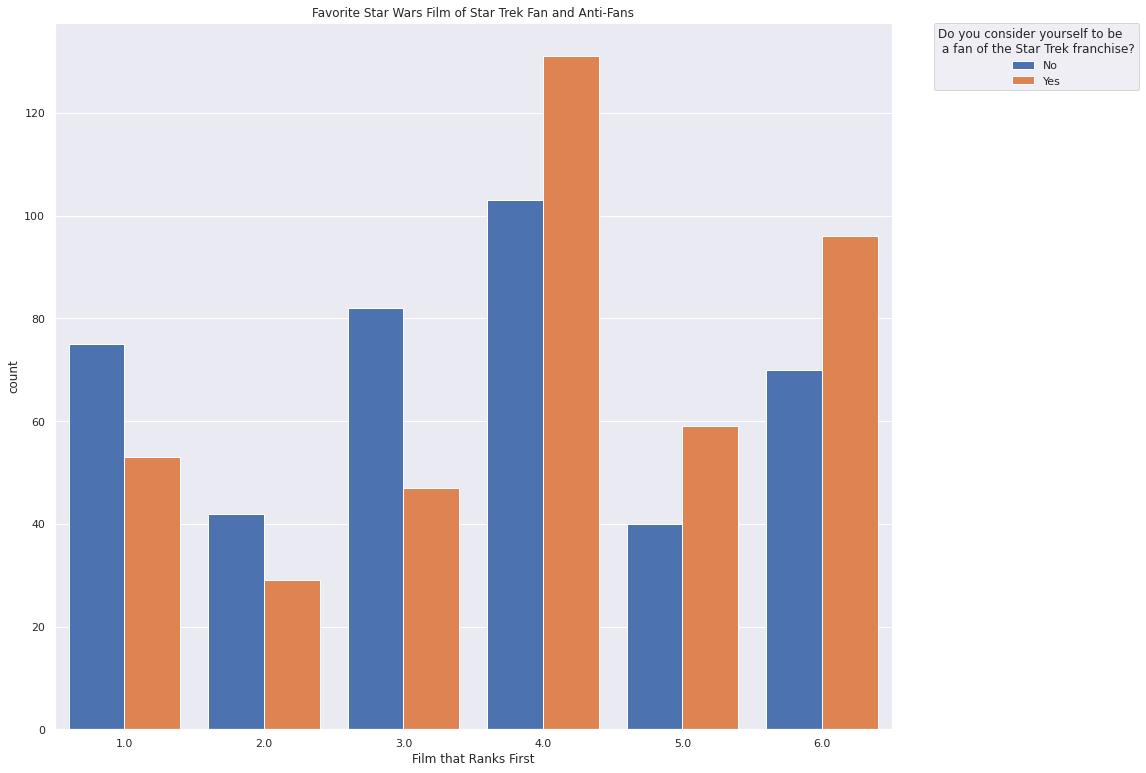

In [ ]:
sns.countplot(x="ranking_1", hue= "Do you consider yourself to be a fan of the Star Trek franchise?", data= star_wars, saturation=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Do you consider yourself to be\n a fan of the Star Trek franchise?')
plt.title('Favorite Star Wars Film of Star Trek Fan and Anti-Fans')
plt.xlabel('Film that Ranks First')
sns.set(rc={'figure.figsize':(15,13)})
sns.set_palette("Blues")

In [ ]:
Star_Trek_Fans=star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == "Yes"]
Non_Star_Trek_Fans= star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == "No"]

In [ ]:
ST_Fan_Fav=round(Star_Trek_Fans["ranking_1"].value_counts(normalize=True) ,4)*100
Non_ST_Fan_Fav=round(Non_Star_Trek_Fans["ranking_1"].value_counts(normalize=True) ,4)*100


In [ ]:
print("ST_Fan_Fav"); print(ST_Fan_Fav); print("Non_ST_Fan_Fav");  print(Non_ST_Fan_Fav)

ST_Fan_Fav
4.0    31.57
6.0    23.13
5.0    14.22
1.0    12.77
3.0    11.33
2.0     6.99
Name: ranking_1, dtype: float64
Non_ST_Fan_Fav
4.0    25.00
3.0    19.90
1.0    18.20
6.0    16.99
2.0    10.19
5.0     9.71
Name: ranking_1, dtype: float64


####Results of the Analysis of Star Trek Fans' and Non-Fans' and their Top Ranking Star Wars Film

* The majorty of both Star Trek fans and non-Star Trek fans rank the fourth film as their top ranking film with 31.57% and 25% respectively.

* The least amount of Star Trek fans ranked the second film as number 1 with only 6.99% thinking so, and the least amount of Non-Star Trek fans ranked the fifth film as their favorite at only 9.71%.

###Star Trek Fans' and Non-Fans' and their Lowest Ranking Star Wars Film 

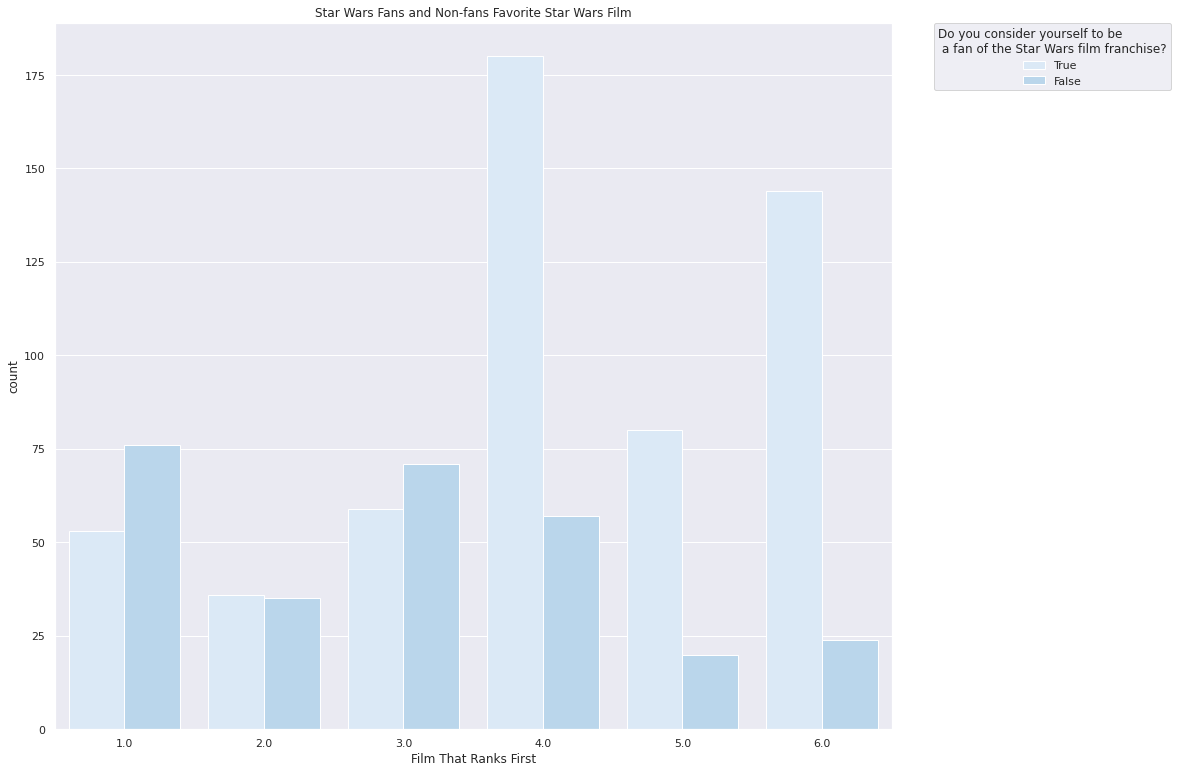

In [ ]:
sns.countplot(x="ranking_1", hue= "Do you consider yourself to be a fan of the Star Wars film franchise?", data= star_wars, saturation=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Do you consider yourself to be\n a fan of the Star Wars film franchise?')
plt.title('Star Wars Fans and Non-fans Favorite Star Wars Film')
plt.xlabel('Film That Ranks First')
sns.set(rc={'figure.figsize':(15,13)})
sns.set_palette("cool" ,4)

In [ ]:
ST_Fan_not_Fav=round(Star_Trek_Fans["ranking_6"].value_counts(normalize=True) ,4)*100
Non_ST_Fan_not_Fav=round(Non_Star_Trek_Fans["ranking_6"].value_counts(normalize=True) ,4)*100

In [ ]:
print("ST_Fan_not_Fav"); print(ST_Fan_not_Fav); print("Non_ST_Fan_not_Fav"); print(Non_ST_Fan_not_Fav)

ST_Fan_not_Fav
2.0    30.84
3.0    28.92
1.0    16.87
6.0    11.33
4.0     8.43
5.0     3.61
Name: ranking_6, dtype: float64
Non_ST_Fan_not_Fav
2.0    24.46
3.0    23.49
6.0    23.49
1.0    18.40
5.0     5.08
4.0     5.08
Name: ranking_6, dtype: float64


####Results of the Analysis of Star Trek Fans' and Non-Fans' and their Lowest Ranking Star Wars Film

* The majority of both Star Trek fans and non-Star Trek fans ranked the second film as their least favorite film with 30.84% and 24.46% ranking it last respectively.

* The least amount of Star Trek fans ranked the fifth film as number 1 with only 3.61%, and the least amount of Non-Star Trek fans ranked the fourth film as the lowest with only 5.08%.

###Star Trek and Star Wars Fandom Crossover

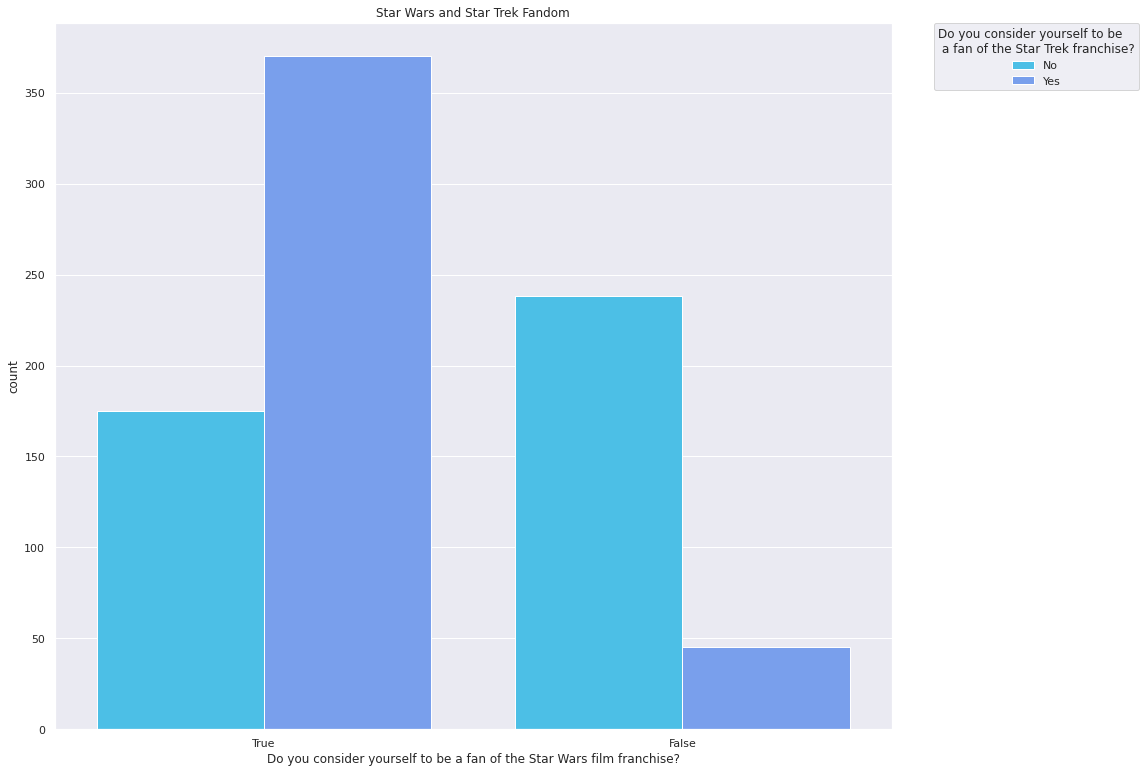

In [ ]:
sns.countplot(x="Do you consider yourself to be a fan of the Star Wars film franchise?", hue= "Do you consider yourself to be a fan of the Star Trek franchise?", data= star_wars)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Do you consider yourself to be\n a fan of the Star Trek franchise?')
plt.title('Star Wars and Star Trek Fandom')
plt.xlabel('Do you consider yourself to be a fan of the Star Wars film franchise?')
sns.set(rc={'figure.figsize':(15,13)})
sns.set_palette("Purples_r" ,5)

In [ ]:
star_wars_fan=star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == "True"]
non_star_wars_fan=star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == "False"]

In [ ]:
SW_Thoughts_on_ST=round(star_wars_fan["Do you consider yourself to be a fan of the Star Trek franchise?"].value_counts(normalize=True) ,4)*100
non_SW_Thoughts_on_ST=round(non_star_wars_fan["Do you consider yourself to be a fan of the Star Trek franchise?"].value_counts(normalize=True) ,4)*100

In [ ]:
print("Star Wars Fans Thoughts on Star Trek"); print(SW_Thoughts_on_ST)

Star Wars Fans Thoughts on Star Trek
Series([], Name: Do you consider yourself to be a fan of the Star Trek franchise?, dtype: float64)


In [ ]:
print("Non-Star Wars Fans Thoughts on Star Trek"); print(non_SW_Thoughts_on_ST)

Non-Star Wars Fans Thoughts on Star Trek
Series([], Name: Do you consider yourself to be a fan of the Star Trek franchise?, dtype: float64)


####Results of the Analysis of Star Trek and Star Wars Fandom Crossover

* The majority of Star Wars fans consider themselves to be a fan of the Star Trek franchise, while the majority of those who do not enjoy Star Wars also do not enjoy Star Trek.

* It stands that there is a decent amount of overlap in the fandoms of these two top sci-fi frnchises. 